# Distance Measure

* How far nodes are away from each other.
* How far is node A from node H? 
* Are some nodes far away from each other and other nodes close to each other in general in this network? 
* Which nodes are closest and which nodes are the furthest away from each other in the network?

## Paths

* **Path:** A sequence of nodes connected by an edge

![](images/distance1.png)

**Find two paths from node G to node C**

* G - F - C
* G - F - E - C

**How far is node A from node H?**

* A - B - C - E - H (4 'hops') -> length of 4
* A - B - C - F - E - H (5-'hops') -> Length of 5

**Path length:** Number of steps it contains from beginning to end.

**Distance between two nodes:** the length of the shorted path between them

The distance between node A and H is 4

`nx.shortest_path(G,'A','H')`

![](images/distance2.png)


In [6]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib widget
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

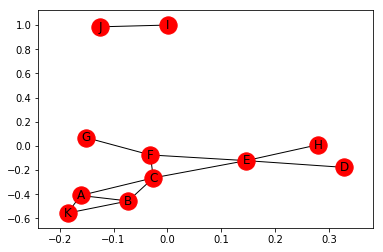

In [20]:
import networkx as nx
%matplotlib inline
G=nx.Graph()
G.add_edges_from([('A','K'),('A','B'),('A','C'),('B','C'),('B','K'),('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('F','G'),('I','J')])
nx.draw_networkx(G)

In [18]:
#plot_graph(G)

FigureCanvasNbAgg()

### Find the shortest path and shortest path length

In [10]:
nx.shortest_path(G,'A','H')

['A', 'C', 'E', 'H']

In [11]:
nx.shortest_path_length(G,'A','H')

3

### Find the distance from node A to every other node

* **Bredth-first search:** a systematic and efficient procedure for computing distances from a node to all other nodes in a large network by "discovering" nodes in layers.


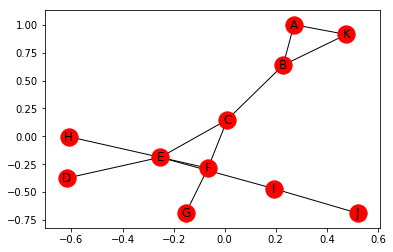

In [24]:
G1=nx.Graph()
G1.add_edges_from([('A','K'),('A','B'),('B','C'),('B','K'),('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('E','I'),('F','G'),('I','J')])
nx.draw_networkx(G1)

![](images/distance3.png)
![](images/distance4.png)
![](images/distance5.png)
![](images/distance6.png)
![](images/distance7.png)
![](images/distance8.png)
![](images/distance9.png)


In [29]:
T=nx.bfs_tree(G1,'A')
T.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('F', 'G'), ('I', 'J')])

![](images/distance10.png) bfs_tree

* Get the shortest pathshortest_path_lengthwith shortest_path_length, you will get dictionary

In [30]:
nx.shortest_path_length(G1,'A')

{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'E': 3,
 'F': 3,
 'D': 4,
 'H': 4,
 'I': 4,
 'G': 4,
 'J': 5}

#### How to characterize the distances between all pairs of nodes in a graph?

* **Average Distance** between every pair of nodes


In [31]:
nx.average_shortest_path_length(G1)

2.5272727272727273

* **Diameter:** maximum distance between any pair of nodes

In [32]:
nx.diameter(G1)

5

* **Eccentricity** of a node $n$ is the largest distance between $n$ and all other nodes.

In [33]:
nx.eccentricity(G1)

{'A': 5,
 'K': 5,
 'B': 4,
 'C': 3,
 'E': 3,
 'F': 3,
 'D': 4,
 'H': 4,
 'I': 4,
 'G': 4,
 'J': 5}

* **Radius** of a graph is the minimum eccentricity

In [34]:
nx.radius(G1)

3

#### How to summarize the distances between all pairs of nodes in a graph?

* **Peripherty** of a graph is the set of nodes that have eccentricity equal to the diameter

In [36]:
nx.periphery(G1)

['A', 'K', 'J']

* **Central** or center of a graph is the set of nodes that have eccentricity equal to the radius

In [38]:
nx.center(G1)

['C', 'E', 'F']

![](images/distance11.png) 
![](images/distance12.png) 

![](images/distance13.png) 

The diameter of the network is 3 and the distance from B to C is 3 (path B-D-G-C). Hence, node B is in the periphery. The maximum distance from node H to any other node is 2, so H is not in the periphery.

### Examples

* Karate Club Network

![](images/distance14.png) 

In [39]:
G = nx.karate_club_graph()
G= nx.convert_node_labels_to_integers(G,first_label=1)
nx.average_shortest_path_length(G)


2.408199643493761

In [40]:
nx.radius(G)

3

In [41]:
nx.diameter(G)

5

In [42]:
nx.center(G)

[1, 2, 3, 4, 9, 14, 20, 32]

In [43]:
nx.periphery(G)

[15, 16, 17, 19, 21, 23, 24, 27, 30]

![](images/distance15.png) 

* Center in red
* Periphery in blue

node 34 looks pretty "central" but it has distance 4 to node 17 (greater than radius)

# Summary

![](images/distance16.png) 